In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
import cmocean as cmo
import xarray as xr 
import cartopy
import cartopy.crs as ccrs
from scipy.io import loadmat
from scipy.interpolate import interp1d
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# LOAD BOTTOM SLOPES 
x = loadmat('/Users/jakesteinberg/Documents/CPT/vertical_structure/CM26_global_slope.mat')
lon0 = x['lon'][:,0]
lat = x['lat'][:,0]
gamma0 = np.transpose(x['gamma']) # eastward 
alpha0 = np.transpose(x['alpha']) # northward 
roughness = np.transpose(x['rms_rough'])
# realign so lon-grid goes from 0-360
roughness = np.concatenate((roughness[:,lon0 >= 0], roughness[:,lon0 < 0]),axis=1)
alpha0 = np.concatenate((alpha0[:,lon0 >= 0], alpha0[:,lon0 < 0]),axis=1)
gamma0 = np.concatenate((gamma0[:,lon0 >= 0], gamma0[:,lon0 < 0]),axis=1)
lon = np.concatenate((lon0[lon0 >= 0], lon0[lon0 < 0]+360))

In [3]:
# LOAD EOFS
cm26_eof_path = '/Users/jakesteinberg/Documents/CPT/models/CM2.6_EOF_analysis.nc'
cmEOF = xr.open_dataset(cm26_eof_path)
# shift EOF longitudes to match with modes 
lon01 = cmEOF.lon.data
eofu1 = np.concatenate((cmEOF.EOF1u[:,:,lon01 >= 0].data, cmEOF.EOF1u[:,:,lon01 < 0].data),axis=2)
eofv1 = np.concatenate((cmEOF.EOF1v[:,:,lon01 >= 0].data, cmEOF.EOF1u[:,:,lon01 < 0].data),axis=2)
lon1 = np.concatenate((lon01[lon01 >= 0], lon01[lon01 < 0]+360))
lat1 = cmEOF.lat.data
data_coords = {'depth': cmEOF.zl.data, 'latitude': lat1, 'longitude': lon1}
EOF1u = xr.DataArray(data=eofu1, dims=['depth','latitude','longitude'], coords=data_coords) 
EOF1v = xr.DataArray(data=eofu1, dims=['depth','latitude','longitude'], coords=data_coords) 
# trim in lat to match N2 data (maybe not needed)
EOF1u_trim = EOF1u[:,4:-25,:]
EOF1v_trim = EOF1v[:,4:-25,:]
lat_trim = lat1[4:-25]
EOF_z = cmEOF.zl.data

In [21]:
EOF1u

<xarray.DataArray (depth: 50, latitude: 270, longitude: 360)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.01368156, -0.21885881, -0.8769862 , ..., -0.09317025,
         -0.19485597, -0.8230869 ],
        [-0.164524  , -0.37910652, -0.04872577, ..., -0.11811062,
          0.1175229 , -0.06488253],
        [ 0.1433355 , -0.1756861 , -0.10523107, ..., -0.14738514,
         -0.10934511, -0.12360705]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.0633703 , -0.15260926, -0.25587568, ..., -0.10163584,
         -0.05043157, -0.36249995],
        [-0.10128646, -0.27088803,  0.04408835, ..., -0.13911818,
          0.13674298, -0.03568479],
        [ 0.16046743, -0.20022266, -0.11665542, ..., -0.1737182 ,
         -0.14777376, -0.14403875]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.13504915, -0.17605804, -0.1025153 , ..., -0.15273307,
         -0.02775459, -0.18261003],
        [-0.09697392, -0.21408239,  0.13838309, ..., -0.17958997,
          0.17309298, -0.06278438],
        [ 0.20950566, -0.26641923, -0.16013396, ..., -0.22410157,
         -0.18359795, -0.18459427]],

       ...,

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * depth      (depth) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * latitude   (latitude) float64 -81.11 -80.69 -80.26 ... 88.7

In [4]:
# load stratification (for now match N2 to CM2.6 grid)
x = loadmat('/Users/jakesteinberg/Documents/CPT/vertical_structure/global_1deg_N2smooth_slope.mat') # global_n2_2deg_slope.mat')
N2_lon = x['lon'][:,0]    
N2_lon[N2_lon < 0] = 360-np.abs(N2_lon[N2_lon < 0])
N2_lat = x['lat'][:,0]   
N2 = x['N2']      
N2 = np.concatenate((N2[N2_lon < 180,:,:], N2[N2_lon > 180,:,:]),axis=0)
N2_lon = np.concatenate((N2_lon[N2_lon < 180], N2_lon[N2_lon > 180]))
N2_z = -1.*x['dep'][:,0]

In [5]:
# DEFINE NEW GRID TO SMOOTH TO (faster computation time...at a desired resolution)
lon_step = 2
lat_step = 2 
z_step = 100
lon_grid = np.arange(0,360,lon_step)
lat_grid = np.arange(-78,78,lat_step)
z_grid = EOF_z # np.arange(0,6000,z_step)
N2_out = np.nan*np.ones((len(z_grid),len(lat_grid),len(lon_grid)))
EOFu_out = np.nan*np.ones((len(z_grid),len(lat_grid),len(lon_grid)))
EOFv_out = np.nan*np.ones((len(z_grid),len(lat_grid),len(lon_grid)))
alpha_out = np.nan*np.ones((len(lat_grid),len(lon_grid)))
gamma_out = np.nan*np.ones((len(lat_grid),len(lon_grid)))
for i in tqdm(range(len(lon_grid))):
    for j in range(len(lat_grid)):
        t_lon = lon_grid[i]
        t_lat = lat_grid[j]
        # lat/lon = gamma,alpha
        # lat_trim/lon1 = EOFs
        # N2_lat/N2_lon = N2
        s_lon_in = np.where((lon > (t_lon-lon_step/2)) & (lon < (t_lon+lon_step/2)))[0]
        s_lat_in = np.where((lat > (t_lat-lat_step/2)) & (lat < (t_lat+lat_step/2)))[0]
        
        E_lon_in = np.where((lon1 > (t_lon-lon_step/2)) & (lon1 < (t_lon+lon_step/2)))[0]
        E_lat_in = np.where((lat_trim > (t_lat-lat_step/2)) & (lat_trim < (t_lat+lat_step/2)))[0]
        
        N_lon_in = np.where((N2_lon > (t_lon-lon_step)) & (N2_lon < (t_lon+lon_step)))[0]
        N_lat_in = np.where((N2_lat > (t_lat-lat_step)) & (N2_lat < (t_lat+lat_step)))[0]
        N2_int = np.nanmean(np.nanmean(N2[N_lon_in][:,N_lat_in,:],axis=0),axis=0)
        
        if len(np.where(~np.isnan(N2_int))[0]) < 5:
            continue
        # print('good')
        z_in = -1*N2_z[~np.isnan(N2_int)]
        good = np.where(z_grid <= np.nanmax(z_in))[0]
        N2_out[good,j,i] = np.interp(z_grid[good],-1*N2_z,N2_int)
        alpha_out[j,i] = np.nanmean(np.nanmean(alpha0[s_lat_in][:,s_lon_in],axis=0),axis=0)
        gamma_out[j,i] = np.nanmean(np.nanmean(gamma0[s_lat_in][:,s_lon_in],axis=0),axis=0)
        
        EOFu_int = EOF1u_trim[:,E_lat_in][:,:,E_lon_in]
        for k in range(len(E_lat_in)):
            for l in range(len(E_lon_in)):
                if np.nanmean(EOFu_int[0:4,k,l]) < 0:
                    EOFu_int[:,k,l] = -1*EOFu_int[:,k,l]
                    
        EOFu_out[:,j,i] = np.nanmean(np.nanmean(EOFu_int,axis=1),axis=1)
        # EOFu_out[good,j,i] = np.interp(z_grid[good],EOF_z,EOFu_int)   
        EOFv_int = np.nanmean(np.nanmean(EOF1v_trim[:,E_lat_in][:,:,E_lon_in],axis=1),axis=1)
        EOFv_out[:,j,i] = EOFv_int
        # EOFv_out[good,j,i] = np.interp(z_grid[good],EOF_z,EOFv_int)   

100%|██████████| 180/180 [01:01<00:00,  2.94it/s]


In [6]:
# construct output data array
data_coords = {'depth': z_grid, 'latitude': lat_grid, 'longitude': lon_grid}
N2_da = xr.DataArray(data=N2_out, dims=['depth','latitude','longitude'], coords=data_coords) 
EOFu_da = xr.DataArray(data=EOFu_out, dims=['depth','latitude','longitude'], coords=data_coords) 
EOFv_da = xr.DataArray(data=EOFv_out, dims=['depth','latitude','longitude'], coords=data_coords) 
data_coords = {'latitude': lat_grid, 'longitude': lon_grid}
alpha_da = xr.DataArray(data=alpha_out, dims=['latitude','longitude'], coords=data_coords) 
gamma_da = xr.DataArray(data=gamma_out, dims=['latitude','longitude'], coords=data_coords) 

In [7]:
pct_decay = np.nan*np.ones((len(EOFu_da.latitude),len(EOFu_da.longitude)))
for i in tqdm(range(len(EOFu_da.longitude))):
    for j in range(len(EOFu_da.latitude)):
        if len(np.where(~np.isnan(EOFu_da[:,j,i]))[0]) > 5:
            gi = np.where(~np.isnan(EOFu_da[:,j,i]))[0]
            pct_decay[j,i] = np.nanmean(EOFu_da[gi[-4:],j,i]) / np.nanmean(EOFu_da[0:4,j,i])

100%|██████████| 180/180 [00:15<00:00, 11.51it/s]


In [8]:
data_coords = {'latitude': lat_grid, 'longitude': lon_grid}
pct_decay_da = xr.DataArray(data=pct_decay, dims=['latitude','longitude'], coords=data_coords) 

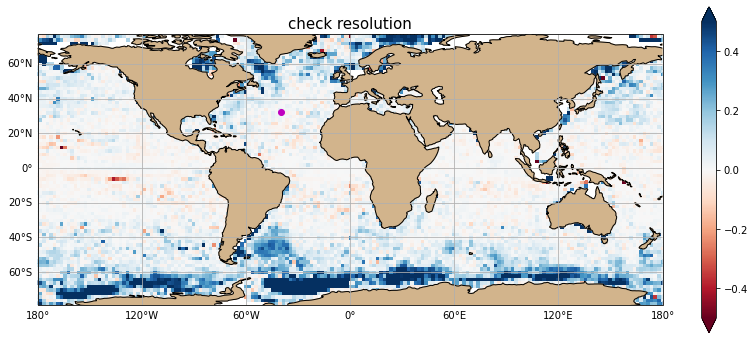

In [9]:
f, ax = plt.subplots(1,1,figsize=(14,6), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)})
# N2_da.sel(depth=z_grid[5]).plot(ax=ax,transform=ccrs.PlateCarree(), cmap=plt.get_cmap('jet'), add_colorbar=True, vmin=0,vmax=0.0001) 
# alpha_da.plot(ax=ax,transform=ccrs.PlateCarree(), cmap=plt.get_cmap('viridis'), add_colorbar=True, vmin=-0.01,vmax=0.01) 
pct_decay_da.plot(ax=ax,transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu'), add_colorbar=True, vmin=-0.5,vmax=0.5) 
ax.scatter(320.5,32.5,color='m')
ax.add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1)
ax.coastlines(); gl = ax.gridlines(draw_labels=True)
ax.set_title('check resolution',fontsize=15)
gl.xlabels_top = False; gl.ylabels_right = False

In [18]:
lon_check = 313
lat_check = -48
i1 = np.where((lon1 > lon_check) & (lon1 < lon_check+1))[0][0]
j1 = np.where((lat_trim > lat_check) & (lat_trim < lat_check+1))[0][0]
i2 = np.where((lon_grid > lon_check) & (lon_grid <= lon_check+2))[0][0]
j2 = np.where((lat_grid > lat_check) & (lat_grid <= lat_check+2))[0][0]

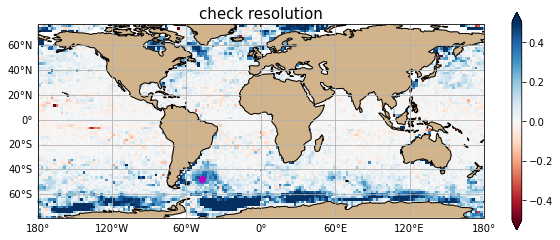

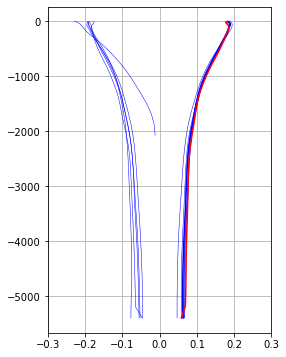

In [20]:
f, ax = plt.subplots(1,1,figsize=(10,4), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)})
pct_decay_da.plot(ax=ax,transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu'), add_colorbar=True, vmin=-0.5,vmax=0.5) 
ax.scatter(lon_check,lat_check,color='m')
ax.add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1)
ax.coastlines(); gl = ax.gridlines(draw_labels=True)
ax.set_title('check resolution',fontsize=15)
gl.xlabels_top = False; gl.ylabels_right = False

f, ax = plt.subplots(1,1,figsize=(4,6))
ax.plot(EOF1u_trim[:,j1,i1],-1*EOF_z,color='b')

ax.plot(EOF1u_trim[:,j1-1,i1],-1*EOF_z,color='b',linewidth=0.5)
ax.plot(EOF1u_trim[:,j1+1,i1],-1*EOF_z,color='b',linewidth=0.5)
ax.plot(EOF1u_trim[:,j1-2,i1],-1*EOF_z,color='b',linewidth=0.5)
ax.plot(EOF1u_trim[:,j1+2,i1],-1*EOF_z,color='b',linewidth=0.5)
ax.plot(EOF1u_trim[:,j1-3,i1],-1*EOF_z,color='b',linewidth=0.5)
ax.plot(EOF1u_trim[:,j1+3,i1],-1*EOF_z,color='b',linewidth=0.5)

ax.plot(EOF1u_trim[:,j1,i1-1],-1*EOF_z,color='b',linewidth=0.5)
ax.plot(EOF1u_trim[:,j1,i1+1],-1*EOF_z,color='b',linewidth=0.5)
ax.plot(EOF1u_trim[:,j1,i1-2],-1*EOF_z,color='b',linewidth=0.5)
ax.plot(EOF1u_trim[:,j1,i1+2],-1*EOF_z,color='b',linewidth=0.5)
ax.plot(EOF1u_trim[:,j1,i1-3],-1*EOF_z,color='b',linewidth=0.5)
ax.plot(EOF1u_trim[:,j1,i1+3],-1*EOF_z,color='b',linewidth=0.5)
ax.plot(EOFu_out[:,j2,i2],-1*z_grid,color='r')
ax.set_xlim([-0.3,0.3])
ax.grid()

In [161]:
ds = xr.Dataset(
    data_vars=dict(
        N2=(['z','lat','lon'], N2_out),
        EOFu=(['z','lat','lon'], EOFu_out),
        EOFv=(['z','lat','lon'], EOFv_out),
        alpha=(['lat','lon'], alpha_out),
        gamma=(['lat','lon'], gamma_out),
    ),
    coords=dict(
        z=(['z'],z_grid),
        lat=(['lat'],lat_grid),
        lon=(['lon'],lon_grid),
    )
)

In [162]:
ds.to_netcdf(path='/Users/jakesteinberg/Documents/CPT/vertical_structure/CM_comparisons/prep_for_modes_2deg.nc')

In [163]:
z_grid

array([5.03354979e+00, 1.51006498e+01, 2.52193508e+01, 3.53584518e+01,
       4.55763512e+01, 5.58532486e+01, 6.62617493e+01, 7.68028488e+01,
       8.75769501e+01, 9.86232529e+01, 1.10096153e+02, 1.22106651e+02,
       1.34908554e+02, 1.48746643e+02, 1.64053757e+02, 1.81312454e+02,
       2.01262955e+02, 2.24777252e+02, 2.53068146e+02, 2.87550842e+02,
       3.30007751e+02, 3.82365051e+02, 4.46726349e+02, 5.24982422e+02,
       6.18703125e+02, 7.28692078e+02, 8.54993530e+02, 9.96715271e+02,
       1.15237610e+03, 1.31999670e+03, 1.49756189e+03, 1.68305725e+03,
       1.87478821e+03, 2.07125195e+03, 2.27132324e+03, 2.47404297e+03,
       2.67875708e+03, 2.88489795e+03, 3.09211719e+03, 3.30008594e+03,
       3.50863306e+03, 3.71756714e+03, 3.92681274e+03, 4.13625146e+03,
       4.34586377e+03, 4.55556592e+03, 4.76536865e+03, 4.97520947e+03,
       5.18511084e+03, 5.39502295e+03])